In [8]:
import json
import gzip
from textblob import TextBlob
import matplotlib.pylab as plt
import numpy as np

In [16]:
with gzip.GzipFile("tweet_data_zip", 'r') as data_in:
    data_bytes = data_in.read()

data_str = data_bytes.decode('utf-8')
tweet_data = json.loads(data_str)

In [10]:
tweet_data[0]

{u'array_agg': u'{congressperson,Republican,republican}',
 u'created_at': u'2016-09-09T15:24:36',
 u'hashtag_entities': u'{NeverForget}',
 u'location': None,
 u'screen_name': u'RepStefanik',
 u'tweet_text': u'Joined my colleagues on the @uscapitol to pay tribute to the thousands of lives lost on 9/11 #NeverForget https://t.co/Rw8gpFGU0S',
 u'user_id': 2962813893}

In [11]:
king_tweets = []
murray_tweets = []
for tweet in tweet_data:
    if tweet['screen_name'].lower() == 'stevekingia':
        king_tweets.append(tweet)
    if tweet['screen_name'].lower() == 'pattymurray':
        murray_tweets.append(tweet)

In [12]:
prolife_tweets_king = []
prolife_tweets_murray = []
for tweet in king_tweets:
    if " gun" in tweet['tweet_text'].lower():
        prolife_tweets_king.append(tweet)
for tweet in murray_tweets:
    if " gun" in tweet['tweet_text'].lower():
        prolife_tweets_murray.append(tweet)

In [13]:
prolife_polar_king = []
prolife_subj_king = []
prolife_polar_murray = []
prolife_subj_murray = []
for tweet in prolife_tweets_king:
    txt = TextBlob(tweet['tweet_text'])
    sent = txt.sentiment
    prolife_polar_king.append(sent.polarity)
    prolife_subj_king.append(sent.subjectivity)
for tweet in prolife_tweets_murray:
    txt = TextBlob(tweet['tweet_text'])
    sent = txt.sentiment
    prolife_polar_murray.append(sent.polarity)
    prolife_subj_murray.append(sent.subjectivity)

In [14]:
king_max_polar = np.argmax(np.array(prolife_polar_king))
king_min_polar = np.argmin(np.array(prolife_polar_king))
king_max_subj = np.argmax(np.array(prolife_subj_king))
king_min_subj = np.argmin(np.array(prolife_subj_king))
murray_max_polar = np.argmax(np.array(prolife_polar_king))
murray_min_polar = np.argmin(np.array(prolife_polar_king))
murray_max_subj = np.argmax(np.array(prolife_subj_king))
murray_min_subj = np.argmin(np.array(prolife_subj_king))

King Tweets: 

Most Positive: How many might have been killed if Leftists had disarmed the good guy. Good guy with gun stops bad guy with gun. https://t.co/jegbAw4nWL

Most Negative: I've had it with the gun grabbing Democrats and their sit in anti 2nd amendment jihad. I'm going to go home and buy a new gun.

Most Subjective: Time to buy a new gun at the Iowa State Fair. Hard to do a background check for a 6 yr old. https://t.co/J9VeeR3zNS

Least Subjective: I've had it with the gun grabbing Democrats and their sit in anti 2nd amendment jihad. I'm going to go home and buy a new gun.

---
Murray Tweets: 

Most Positive: Murray: We have a lot to do &amp; I'll be fighting to get back to work on #Zika funding, consideration for @SCOTUSnom &amp; addressing gun violence.

Most Negative: Murray discusses gun control, #Zika, #SCOTUS, expanding access to paid sick leave - https://t.co/khWSDGE2Qi via @komonews

Most Subjective: People across the country are asking Congress to take action &amp; t

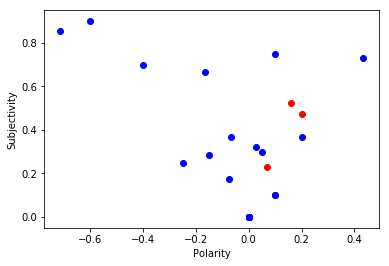

In [15]:
fig, ax = plt.subplots()
ax.set(xlabel='Polarity', ylabel='Subjectivity')
ax.scatter(prolife_polar_king, prolife_subj_king, color = "red")
ax.scatter(prolife_polar_murray, prolife_subj_murray, color = "blue")

print("King Tweets: \n")
print("Most Positive: " + prolife_tweets_king[king_max_polar]['tweet_text'] + '\n')
print("Most Negative: " + prolife_tweets_king[king_min_polar]['tweet_text'] + '\n')
print("Most Subjective: " + prolife_tweets_king[king_max_subj]['tweet_text'] + '\n')
print("Least Subjective: " + prolife_tweets_king[king_min_subj]['tweet_text'] + '\n')
print("---")
print("Murray Tweets: \n")
print("Most Positive: " + prolife_tweets_murray[murray_max_polar]['tweet_text'] + '\n')
print("Most Negative: " + prolife_tweets_murray[murray_min_polar]['tweet_text'] + '\n')
print("Most Subjective: " + prolife_tweets_murray[murray_max_subj]['tweet_text'] + '\n')
print("Least Subjective: " + prolife_tweets_murray[murray_min_subj]['tweet_text'] + '\n')